In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [4]:
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df[df['Year'].isnull()|df['Genre'].isnull()|df['Publisher'].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...,...
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [8]:
df_clean = df.copy()

In [9]:
df_clean.Publisher.fillna('Unknown',inplace=True)

In [10]:
df_clean.dropna(axis=0, inplace=True); #결측치제거
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16277 non-null  int64  
 1   Name         16277 non-null  object 
 2   Platform     16277 non-null  object 
 3   Year         16277 non-null  float64
 4   Genre        16277 non-null  object 
 5   Publisher    16277 non-null  object 
 6   NA_Sales     16277 non-null  object 
 7   EU_Sales     16277 non-null  object 
 8   JP_Sales     16277 non-null  object 
 9   Other_Sales  16277 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [11]:
df_clean = df_clean.drop(df.columns[0], axis=1).reset_index(drop=True)
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [12]:
df_clean.duplicated().sum()

0

In [13]:
df_clean.Year.value_counts()

2009.0    1418
2008.0    1413
2010.0    1248
2007.0    1193
2011.0    1126
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [14]:
df_clean[df_clean['Year']<1900].value_counts(df_clean.Year)

Year
11.0    10
8.0     10
9.0     10
3.0      7
6.0      7
10.0     7
15.0     5
16.0     5
4.0      4
5.0      4
95.0     4
96.0     3
0.0      3
7.0      3
2.0      3
98.0     3
13.0     2
14.0     2
12.0     2
1.0      2
97.0     2
86.0     1
94.0     1
dtype: int64

In [15]:
def corr_year(i):
  if i<20:
    i=i+2000
    return i
  elif (i<100)&(i>20):
    i=i+1900
    return i
  else:
    return i

In [16]:
df_clean.Year = df_clean.Year.apply(corr_year)

In [17]:
df_clean.Year = df_clean.Year.astype(str).str[:-2]

In [18]:
df_clean.Year

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16272    2006
16273    2005
16274    2015
16275    2013
16276    1996
Name: Year, Length: 16277, dtype: object

In [19]:
drop_index = df_clean[df_clean['Year']=='2020'].index
df_clean = df_clean.drop(drop_index)

In [20]:
df_clean.iloc[10]

Name                  Ford Racing
Platform                       PS
Year                         2001
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     480K
EU_Sales                    0.33M
JP_Sales                       0K
Other_Sales                  0.06
Name: 10, dtype: object

In [21]:
df_clean[df_clean['NA_Sales'].str.contains(r'[a-zA-Z]')|
         df_clean['EU_Sales'].str.contains(r'[a-zA-Z]')|
         df_clean['JP_Sales'].str.contains(r'[a-zA-Z]')|
         df_clean['Other_Sales'].str.contains(r'[a-zA-Z]')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.3,0.03M,0.04,0.03
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
62,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,0,0,0M
71,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
...,...,...,...,...,...,...,...,...,...
16206,Planet Monsters,GBA,2001,Action,Titus,0.01,0K,0,0
16251,Koihime Enbu,PS4,2016,Fighting,Yeti,0,0M,0.02,0
16258,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,320K,0.22,0,0.04
16260,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0,0.03,0M,0


In [22]:
def corr_sales(i):
  if i[-1] == 'K':
    i=i.replace('K','')
    i=float(i)*(1/1000)
    return i
  elif i[-1] == 'M':
    i=i.replace('M','')
    return i
  else:
    return i

In [23]:
df_clean['NA_Sales'] = df_clean['NA_Sales'].apply(corr_sales).astype(float)
df_clean['EU_Sales'] = df_clean['EU_Sales'].apply(corr_sales).astype(float)
df_clean['JP_Sales'] = df_clean['JP_Sales'].apply(corr_sales).astype(float)
df_clean['Other_Sales'] = df_clean['Other_Sales'].apply(corr_sales).astype(float)

In [24]:
df_clean.iloc[10]

Name                  Ford Racing
Platform                       PS
Year                         2001
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     0.48
EU_Sales                     0.33
JP_Sales                      0.0
Other_Sales                  0.06
Name: 10, dtype: object

In [25]:
df_clean['Total_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [26]:
favor_genre = df_clean[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
favor_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16272,Platform,0.15,0.04,0.00,0.01,0.20
16273,Action,0.01,0.00,0.00,0.00,0.01
16274,Sports,0.44,0.19,0.03,0.13,0.79
16275,Action,0.05,0.05,0.25,0.03,0.38


In [27]:
favor_genre_group = favor_genre.groupby('Genre').sum().reset_index()
NA_favor_genre = favor_genre_group[['Genre','NA_Sales']].sort_values('NA_Sales',ascending=False).reset_index(drop=True)
EU_favor_genre = favor_genre_group[['Genre','EU_Sales']].sort_values('EU_Sales',ascending=False).reset_index(drop=True)
JP_favor_genre = favor_genre_group[['Genre','JP_Sales']].sort_values('JP_Sales',ascending=False).reset_index(drop=True)
Other_favor_genre = favor_genre_group[['Genre','Other_Sales']].sort_values('Other_Sales',ascending=False).reset_index(drop=True)
Total_favor_genre = favor_genre_group[['Genre','Total_Sales']].sort_values('Total_Sales',ascending=False).reset_index(drop=True)

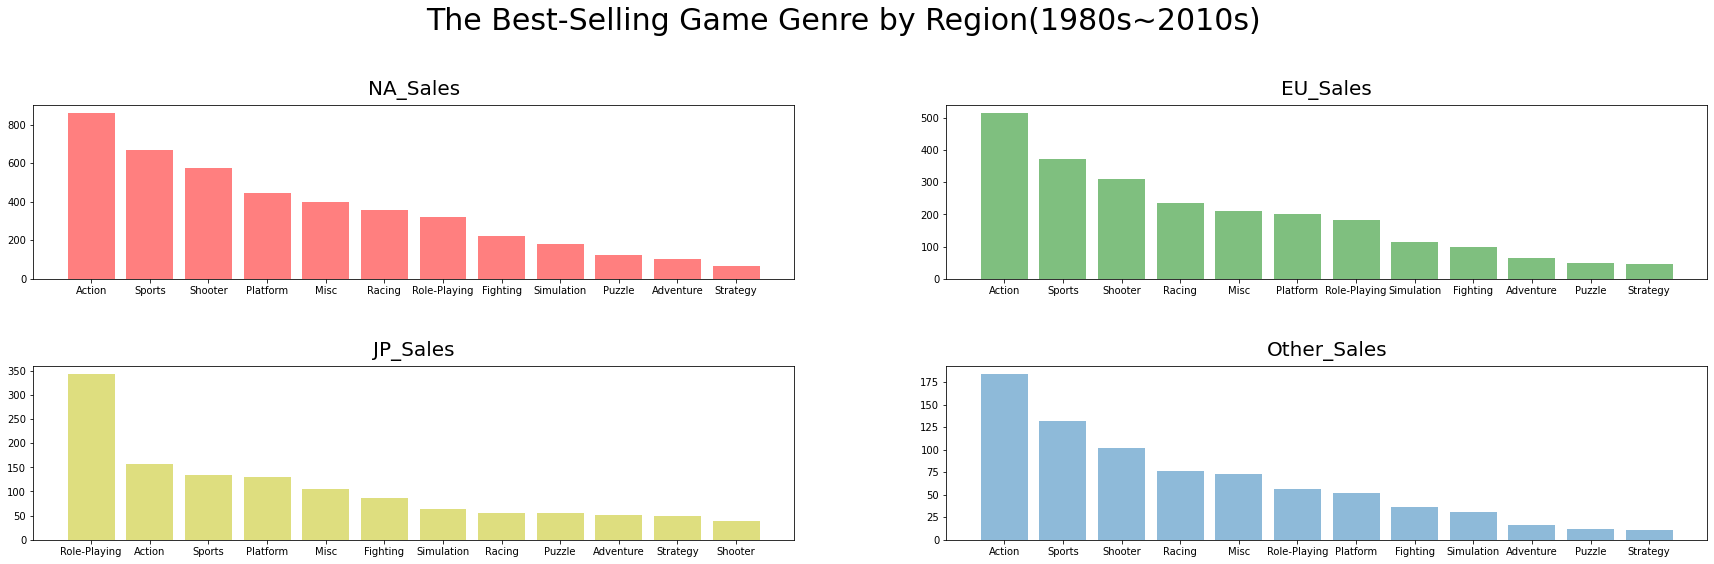

In [112]:
# 지역별 선호 게임 장르 시각화
fig = plt.figure(figsize=(30,8))
fig.suptitle("The Best-Selling Game Genre by Region(1980s~2010s)", fontsize=30,y=1.05)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.subplots_adjust(hspace=0.5)
ax1.bar(NA_favor_genre['Genre'],NA_favor_genre['NA_Sales'],color='r',alpha=0.5)
ax1.set_title("NA_Sales",fontsize=20,pad=10)
ax2.bar(EU_favor_genre['Genre'],EU_favor_genre['EU_Sales'],color='g',alpha=0.5)
ax2.set_title("EU_Sales",fontsize=20,pad=10)
ax3.bar(JP_favor_genre['Genre'],JP_favor_genre['JP_Sales'],color='y',alpha=0.5)
ax3.set_title("JP_Sales",fontsize=20,pad=10)
ax4.bar(Other_favor_genre['Genre'],Other_favor_genre['Other_Sales'],alpha=0.5)
ax4.set_title("Other_Sales",fontsize=20,pad=10)
plt.show()

In [29]:
print(df_clean.Year.min(),'~',df_clean.Year.max())

1980 ~ 2017


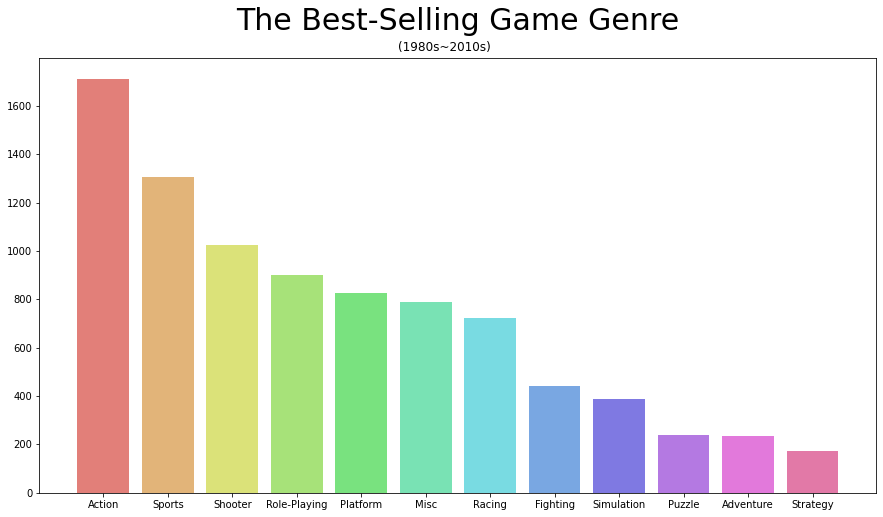

In [105]:
colors = sns.color_palette('hls',len(Total_favor_genre['Genre']))
plt.figure(figsize=(15,8))
plt.bar(Total_favor_genre['Genre'],Total_favor_genre['Total_Sales'],color=colors,alpha=0.8)
plt.title("The Best-Selling Game Genre", fontsize=30,y=1.05)
plt.suptitle('(1980s~2010s)', y=0.91)
plt.show()

## 2. 연도별 게임의 트렌드가 있을까

In [31]:
tby = df_clean[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
trend_by_year = tby.groupby(['Year','Genre']).sum().reset_index()
tot_trend_by_year = tby.groupby('Year').sum().reset_index()
total_trend = trend_by_year[['Year','Genre','Total_Sales']].sort_values('Year')

s1980 = total_trend[(total_trend['Year']>='1980')&(total_trend['Year']<'1990')]
s1990 = total_trend[(total_trend['Year']>='1990')&(total_trend['Year']<'2000')]
s2000 = total_trend[(total_trend['Year']>='2000')&(total_trend['Year']<'2010')]
s2010 = total_trend[total_trend['Year']>='2010']
trend_by_year

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,Action,0.32,0.02,0.00,0.00,0.34
1,1980,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980,Misc,2.53,0.15,0.00,0.02,2.70
3,1980,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981,Action,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...
382,2016,Simulation,0.00,0.09,0.30,0.00,0.39
383,2016,Sports,4.57,7.36,0.78,1.92,14.63
384,2016,Strategy,0.11,0.32,0.05,0.04,0.52
385,2017,Action,0.00,0.00,0.01,0.00,0.01


In [32]:
best_s1980_with_year = s1980.sort_values('Total_Sales',ascending=False).reset_index(drop=True)
best_s1990_with_year = s1990.sort_values('Total_Sales',ascending=False).reset_index(drop=True)
best_s2000_with_year = s2000.sort_values('Total_Sales',ascending=False).reset_index(drop=True)
best_s2010_with_year = s2010.sort_values('Total_Sales',ascending=False).reset_index(drop=True)

best_s1980 = best_s1980_with_year.groupby('Genre').sum().sort_values('Total_Sales',ascending=False).reset_index()
best_s1990 = best_s1990_with_year.groupby('Genre').sum().sort_values('Total_Sales',ascending=False).reset_index()
best_s2000 = best_s2000_with_year.groupby('Genre').sum().sort_values('Total_Sales',ascending=False).reset_index()
best_s2010 = best_s2010_with_year.groupby('Genre').sum().sort_values('Total_Sales',ascending=False).reset_index()

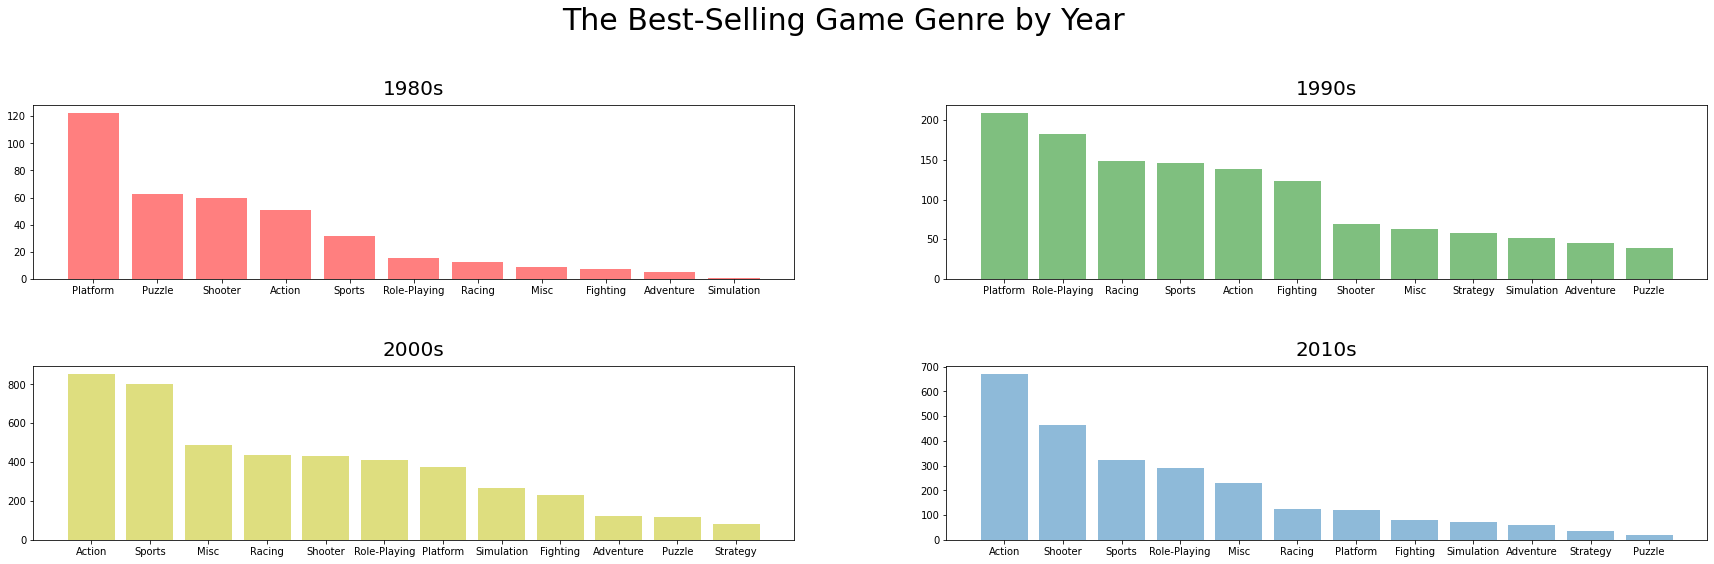

In [33]:
# 연도별 선호 게임 장르 시각화
fig_year = plt.figure(figsize=(30,8))
fig_year.suptitle("The Best-Selling Game Genre by Year", fontsize=30,y=1.05)

ax5 = fig_year.add_subplot(2,2,1)
ax6 = fig_year.add_subplot(2,2,2)
ax7 = fig_year.add_subplot(2,2,3)
ax8 = fig_year.add_subplot(2,2,4)

plt.subplots_adjust(hspace=0.5)

ax5.bar(best_s1980['Genre'],best_s1980['Total_Sales'],color='r',alpha=0.5)
ax5.set_title("1980s",fontsize=20,pad=10)
ax6.bar(best_s1990['Genre'],best_s1990['Total_Sales'],color='g',alpha=0.5)
ax6.set_title("1990s",fontsize=20,pad=10)
ax7.bar(best_s2000['Genre'],best_s2000['Total_Sales'],color='y',alpha=0.5)
ax7.set_title("2000s",fontsize=20,pad=10)
ax8.bar(best_s2010['Genre'],best_s2010['Total_Sales'],alpha=0.5)
ax8.set_title("2010s",fontsize=20,pad=10)
plt.show()

In [34]:
top3_2010s = total_trend[(total_trend['Genre']=='Action')|(total_trend['Genre']=='Shooter')|(total_trend['Genre']=='Sports')]

In [35]:
fig_line = px.line(top3_2010s,x='Year',y='Total_Sales',color='Genre',title='The trend of the best-selling game genre in the 2010s')
fig_line.show()

In [36]:
df_clean['Publisher'].value_counts()

Electronic Arts                 1332
Activision                       963
Namco Bandai Games               924
Ubisoft                          912
Konami Digital Entertainment     821
                                ... 
Marvelous Games                    1
Panther Software                   1
Playmore                           1
mixi, Inc                          1
Mystique                           1
Name: Publisher, Length: 575, dtype: int64

In [37]:
pub_trend = df_clean[['Year','Publisher','Total_Sales']]
groupby_pub = pub_trend.groupby(['Year','Publisher']).sum().reset_index().sort_values('Year')

pub_trend_1980s_year = groupby_pub[(groupby_pub['Year']>='1980')&(groupby_pub['Year']<'1990')]
pub_trend_1990s_year = groupby_pub[(groupby_pub['Year']>='1990')&(groupby_pub['Year']<'2000')]
pub_trend_2000s_year = groupby_pub[(groupby_pub['Year']>='2000')&(groupby_pub['Year']<'2010')]
pub_trend_2010s_year = groupby_pub[groupby_pub['Year']>='2010']

pub_trend_1980s = pub_trend_1980s_year.groupby('Publisher').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]
pub_trend_1990s = pub_trend_1990s_year.groupby('Publisher').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]
pub_trend_2000s = pub_trend_2000s_year.groupby('Publisher').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]
pub_trend_2010s = pub_trend_2010s_year.groupby('Publisher').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]

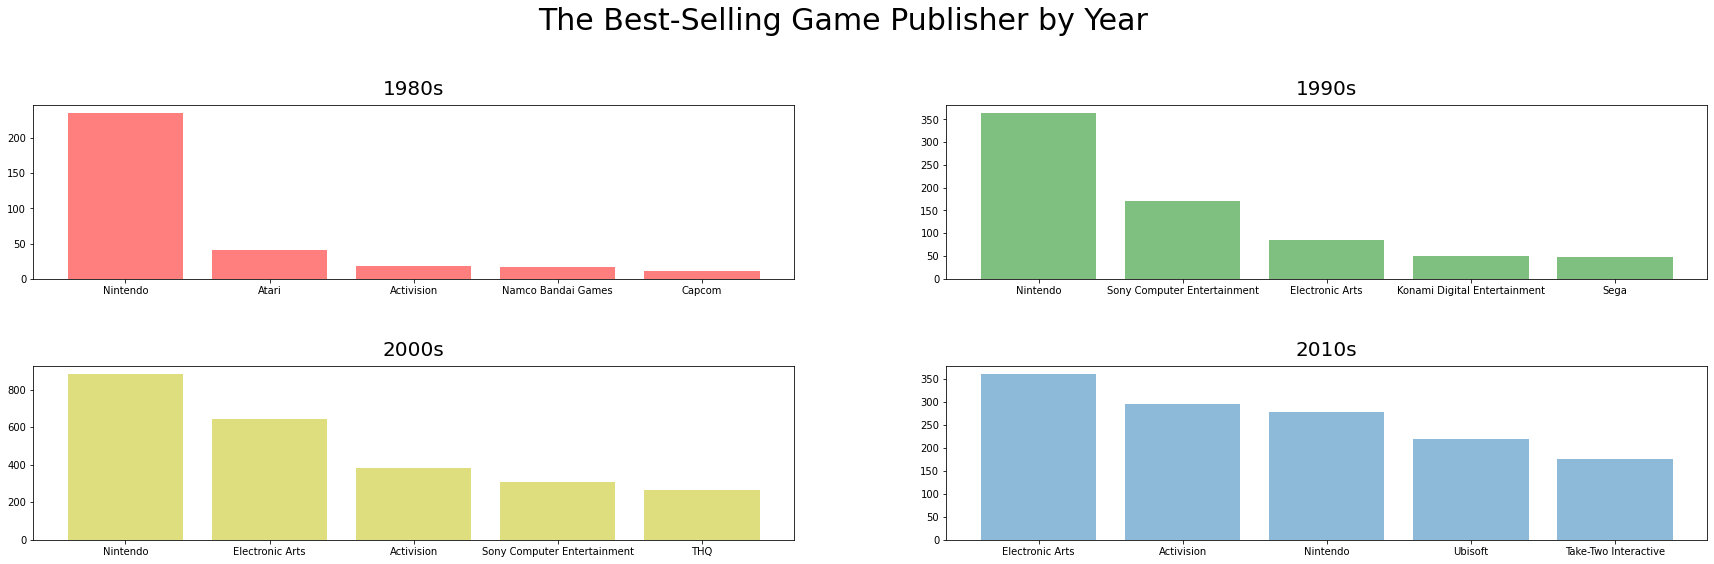

In [38]:
fig_pub = plt.figure(figsize=(30,8))
fig_pub.suptitle("The Best-Selling Game Publisher by Year", fontsize=30,y=1.05)

ax9 = fig_pub.add_subplot(2,2,1)
ax10 = fig_pub.add_subplot(2,2,2)
ax11 = fig_pub.add_subplot(2,2,3)
ax12 = fig_pub.add_subplot(2,2,4)

plt.subplots_adjust(hspace=0.5)

ax9.bar(pub_trend_1980s['Publisher'],pub_trend_1980s['Total_Sales'],color='r',alpha=0.5)
ax9.set_title("1980s",fontsize=20,pad=10)
ax10.bar(pub_trend_1990s['Publisher'],pub_trend_1990s['Total_Sales'],color='g',alpha=0.5)
ax10.set_title("1990s",fontsize=20,pad=10)
ax11.bar(pub_trend_2000s['Publisher'],pub_trend_2000s['Total_Sales'],color='y',alpha=0.5)
ax11.set_title("2000s",fontsize=20,pad=10)
ax12.bar(pub_trend_2010s['Publisher'],pub_trend_2010s['Total_Sales'],alpha=0.5)
ax12.set_title("2010s",fontsize=20,pad=10)

plt.show()

In [39]:
df1 = groupby_pub[groupby_pub['Publisher']=='Nintendo']
df2 = groupby_pub[groupby_pub['Publisher']=='Electronic Arts']
df3 = groupby_pub[groupby_pub['Publisher']=='Activision']
df4 = groupby_pub[groupby_pub['Publisher']=='Ubisoft']
df5 = groupby_pub[groupby_pub['Publisher']=='Take-Two Interactive']

In [40]:
data1 = go.Bar(x=df1['Year'],y=df1['Total_Sales'], name='Nintendo')
data2 = go.Bar(x=df2['Year'],y=df2['Total_Sales'], name='Electronic Arts')
data3 = go.Bar(x=df3['Year'],y=df3['Total_Sales'], name='Activision')
data4 = go.Bar(x=df4['Year'],y=df4['Total_Sales'], name='Ubisoft')
data5 = go.Bar(x=df5['Year'],y=df5['Total_Sales'], name='Take-Two Interactive')

layout = go.Layout(title='The trend of the best-selling game publisher in the 2010s')

fig_pub_bar = go.Figure(data=[data1,data2,data3,data4,data5], layout=layout)
fig_pub_bar.show()

In [41]:
df_clean['Platform'].value_counts()

DS      2128
PS2     2121
PS3     1299
Wii     1284
X360    1232
PSP     1193
PS      1185
PC       940
GBA      809
XB       799
GC       541
3DS      499
PSV      411
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [42]:
platform_trend = df_clean[['Year','Platform','Total_Sales']]
groupby_platform = platform_trend.groupby(['Year','Platform']).sum().reset_index()

platform_trend_1980s_year = groupby_platform[(groupby_platform['Year']>='1980')&(groupby_platform['Year']<'1990')]
platform_trend_1990s_year = groupby_platform[(groupby_platform['Year']>='1990')&(groupby_platform['Year']<'2000')]
platform_trend_2000s_year = groupby_platform[(groupby_platform['Year']>='2000')&(groupby_platform['Year']<'2010')]
platform_trend_2010s_year = groupby_platform[groupby_platform['Year']>='2010']

platform_trend_1980s = platform_trend_1980s_year.groupby('Platform').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]
platform_trend_1990s = platform_trend_1990s_year.groupby('Platform').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]
platform_trend_2000s = platform_trend_2000s_year.groupby('Platform').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]
platform_trend_2010s = platform_trend_2010s_year.groupby('Platform').sum().reset_index().sort_values('Total_Sales',ascending=False).iloc[0:5]
groupby_platform

,Year,Platform,Total_Sales
0,1980,2600,10.88
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
235,2016,WiiU,3.28
236,2016,X360,0.83
237,2016,XOne,12.38
238,2017,PS4,0.03


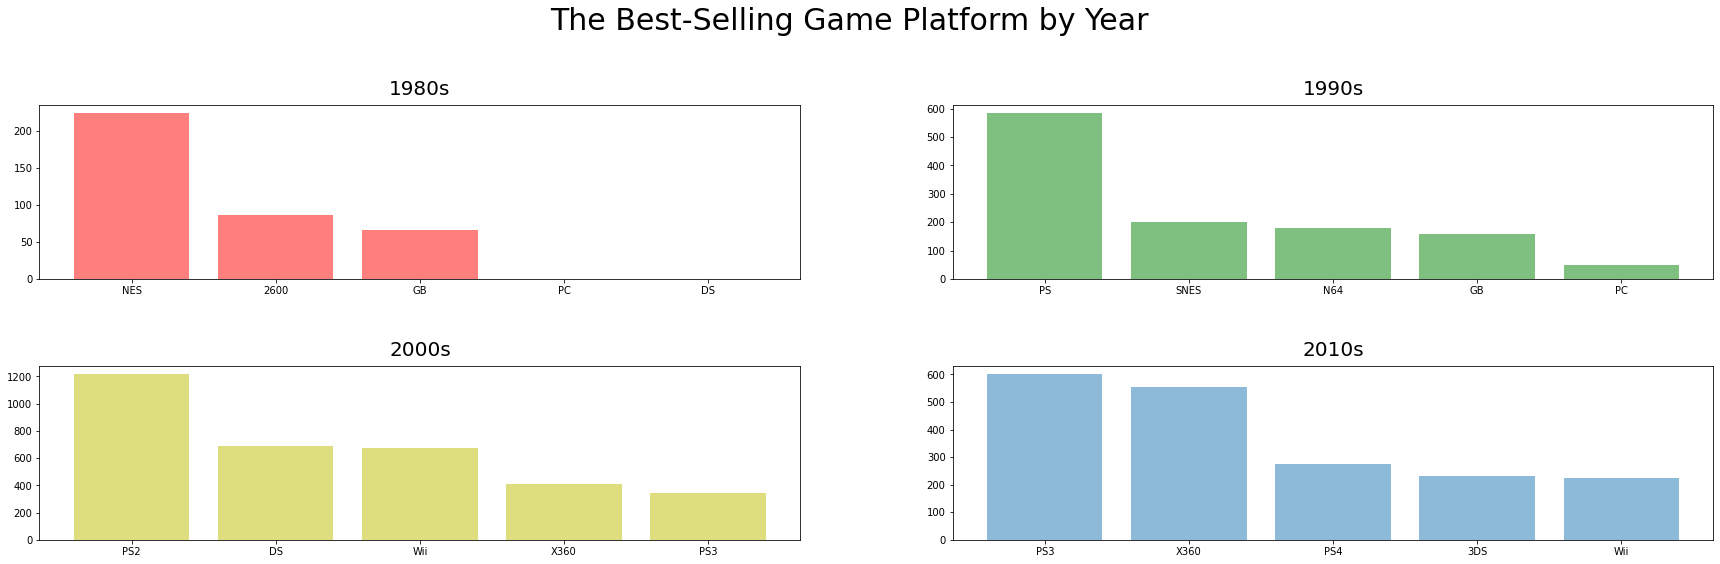

In [43]:
fig_pf = plt.figure(figsize=(30,8))
fig_pf.suptitle("The Best-Selling Game Platform by Year", fontsize=30,y=1.05)

ax13 = fig_pf.add_subplot(2,2,1)
ax14 = fig_pf.add_subplot(2,2,2)
ax15 = fig_pf.add_subplot(2,2,3)
ax16 = fig_pf.add_subplot(2,2,4)

plt.subplots_adjust(hspace=0.5)

ax13.bar(platform_trend_1980s['Platform'],platform_trend_1980s['Total_Sales'],color='r',alpha=0.5)
ax13.set_title("1980s",fontsize=20,pad=10)
ax14.bar(platform_trend_1990s['Platform'],platform_trend_1990s['Total_Sales'],color='g',alpha=0.5)
ax14.set_title("1990s",fontsize=20,pad=10)
ax15.bar(platform_trend_2000s['Platform'],platform_trend_2000s['Total_Sales'],color='y',alpha=0.5)
ax15.set_title("2000s",fontsize=20,pad=10)
ax16.bar(platform_trend_2010s['Platform'],platform_trend_2010s['Total_Sales'],alpha=0.5)
ax16.set_title("2010s",fontsize=20,pad=10)

plt.show()

In [44]:
top5_pf = groupby_platform[(groupby_platform['Platform']=='PS3')|(groupby_platform['Platform']=='X360')|(groupby_platform['Platform']=='PS4')|(groupby_platform['Platform']=='3DS')|(groupby_platform['Platform']=='Wii')]

In [45]:
fig_pf_line = px.line(top5_pf,x='Year',y='Total_Sales',color='Platform',title='The trend of the best-selling game platform in the 2010s')
fig_pf_line.show()

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [46]:
high_sales = df_clean.query('Year >= "2010"').sort_values('Total_Sales',ascending=False).reset_index(drop=True).iloc[0:100]
high_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...
95,Assassin's Creed IV: Black Flag,PS3,2013,Action,Ubisoft,1.33,1.71,0.13,0.73,3.90
96,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,0.67,0.49,2.62,0.11,3.89
97,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88
98,Sports Champions,PS3,2010,Sports,Sony Computer Entertainment,2.12,1.14,0.10,0.51,3.87


1) Top 100 게임의 플랫폼 비율

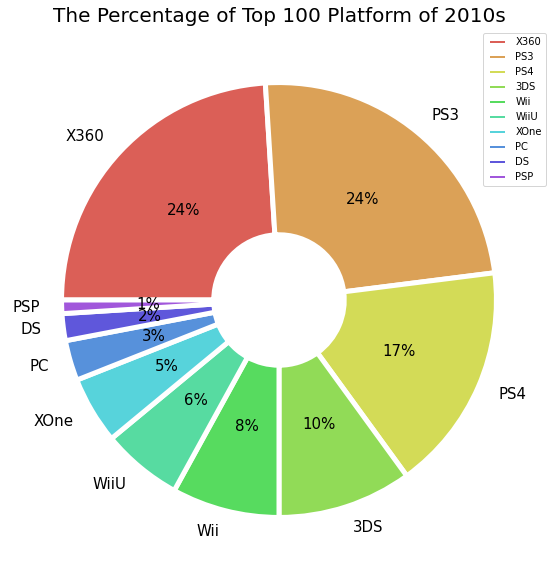

In [88]:
vc_platform = high_sales['Platform'].value_counts()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(10,10))
plt.pie(x=vc_platform, labels=vc_platform.index, autopct='%.f%%',colors=colors,
        wedgeprops=wedgeprops,counterclock=False, startangle=180, textprops={'size':15})
plt.title("The Percentage of Top 100 Platform of 2010s", fontsize=20)
plt.legend(vc_platform.index, loc='upper right')

plt.show()

2) Top 100 게임의 장르 비율

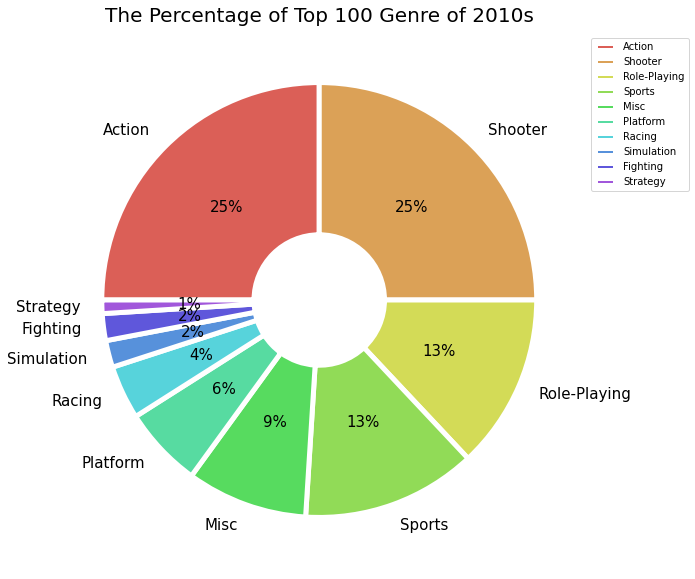

In [89]:
vc_genre = high_sales['Genre'].value_counts()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(10,10))
plt.pie(x=vc_genre, labels=vc_genre.index, autopct='%.f%%',colors=colors,
        wedgeprops=wedgeprops,counterclock=False, startangle=180, textprops={'size':15})
plt.title("The Percentage of Top 100 Genre of 2010s", fontsize=20)
plt.legend(vc_genre.index, loc=(1,0.7))

plt.show()

3) Top 100 게임의 Publisher 비율

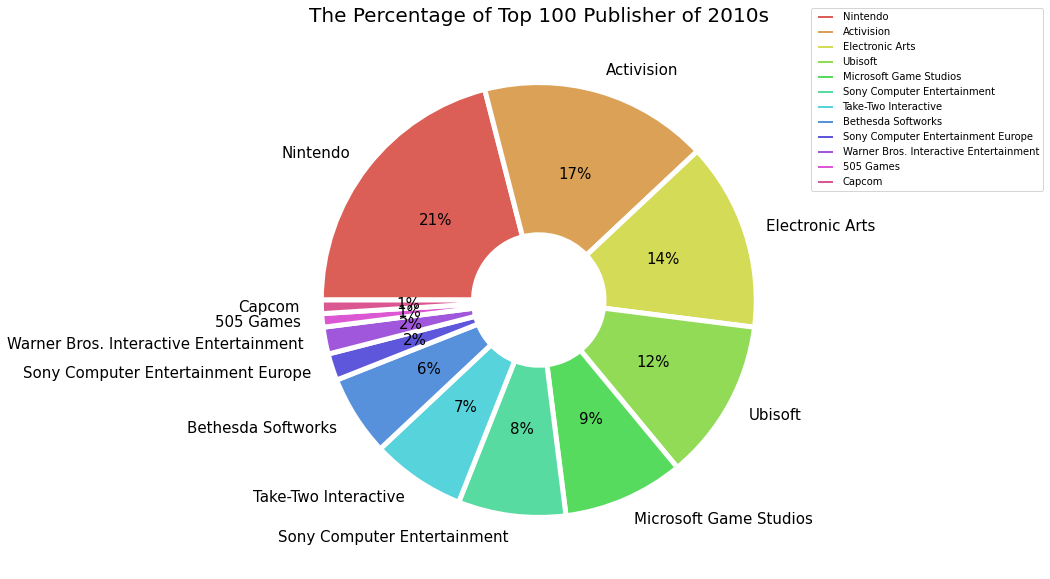

In [90]:
vc_publisher = high_sales['Publisher'].value_counts()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(10,10))
plt.pie(x=vc_publisher, labels=vc_publisher.index, autopct='%.f%%',colors=colors,
        wedgeprops=wedgeprops,counterclock=False, startangle=180, textprops={'size':15})
plt.title("The Percentage of Top 100 Publisher of 2010s", fontsize=20)
plt.legend(vc_publisher.index, loc=(1,0.7))

plt.show()

4) Top 100 게임의 지역 출고량 비율

In [81]:
high_sales['NA_Sales'].sum()/high_sales['Total_Sales'].sum()

0.44519550463001123

In [84]:
NA_per_sales = high_sales['NA_Sales'].sum()/high_sales['Total_Sales'].sum()
EU_per_sales = high_sales['EU_Sales'].sum()/high_sales['Total_Sales'].sum()
JP_per_sales = high_sales['JP_Sales'].sum()/high_sales['Total_Sales'].sum()
Other_per_sales = high_sales['Other_Sales'].sum()/high_sales['Total_Sales'].sum()

sum_high_sales = pd.DataFrame({'NA_Sales' : [NA_per_sales],
                               'EU_Sales' : [EU_per_sales],
                               'JP_Sales' : [JP_per_sales],
                               'Other_Sales' : [Other_per_sales]})
sum_high_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.445196,0.361127,0.076457,0.11722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



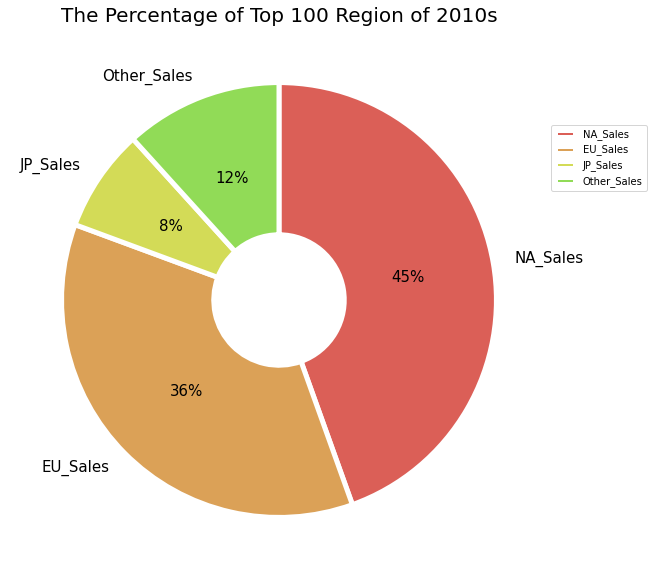

In [91]:
plt.figure(figsize=(10,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(x=sum_high_sales, labels=sum_high_sales.columns, autopct='%.f%%',colors=colors,
        wedgeprops=wedgeprops,counterclock=False, startangle=90, textprops={'size':15})
plt.title("The Percentage of Top 100 Region of 2010s", fontsize=20)
plt.legend(sum_high_sales.columns, loc=(1,0.7))

plt.show()

In [96]:
df[df['Year']==2020.0]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,6907,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0K,0,0.02


In [49]:
fig_line_overall = px.line(tot_trend_by_year, x='Year',y='Total_Sales',title='Overall Game Sales Trends')
fig_line_overall.show()